<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_Hierarchical_clustering_PCA_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix = pd.read_csv('/content/netflix_titles_CLEANED.csv')

In [ ]:
netflix

,show_id,type,title,directors,cast,countries,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   directors     6173 non-null   object
 4   cast          7982 non-null   object
 5   countries     7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
directors,2634
cast,825
countries,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix['directors'] = netflix['directors'].fillna('unknown')

In [ ]:
netflix['cast']=netflix['cast'].fillna('unknown')

In [ ]:
netflix['countries']=netflix['countries'].fillna('unknown')

In [ ]:
netflix['date_added']=netflix['date_added'].fillna('unknown')

In [ ]:
netflix['rating'] = netflix['rating'].fillna('unknown')

In [ ]:
netflix['duration'] = netflix['duration'].fillna('unknown')

In [ ]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
directors,0
cast,0
countries,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
netflix.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in netflix.select_dtypes(include='object'):
  netflix[i] = le.fit_transform(netflix[i])

In [ ]:
netflix

,show_id,type,title,directors,cast,countries,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7677,601,1657,2020,7,210,274,2577
1,1111,1,1091,4516,408,424,1652,2021,11,110,414,1762
2,2222,1,2651,2105,6296,746,1652,2021,11,0,242,7341
3,3333,1,3506,4516,7677,746,1652,2021,11,0,297,3617
4,4444,1,3861,4516,4814,249,1652,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4676,601,1361,2007,8,70,269,895
8803,8672,1,8773,4516,7677,746,726,2018,14,110,424,8483
8804,8673,0,8774,3631,3230,601,1308,2009,8,206,207,5228
8805,8674,0,8777,3247,7061,601,601,2006,6,206,125,3315


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
for i in netflix.columns:
  netflix[i] = ss.fit_transform(netflix[[i]])

In [ ]:
netflix

,show_id,type,title,directors,cast,countries,date_added,release_year,rating,duration,listed_in,description
0,-1.731854,-0.660659,-0.955017,-0.456641,1.452016,0.705645,1.634522,0.659930,-1.537400,1.318402,0.010344,-0.714182
1,-1.294859,1.513640,-1.302726,1.036478,-1.587386,-0.151390,1.624447,0.773324,0.500281,0.184210,1.075245,-1.035989
2,-0.857864,1.513640,-0.689123,-0.584373,0.874576,1.407736,1.624447,0.773324,0.500281,-1.063401,-0.233062,1.166905
3,-0.420868,1.513640,-0.352822,1.036478,1.452016,1.407736,1.624447,0.773324,0.500281,-1.063401,0.185292,-0.303533
4,0.016127,1.513640,-0.213188,1.036478,0.254904,-0.998741,1.624447,0.773324,0.500281,0.184210,0.915510,0.011956
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,1.678754,-0.660659,1.717694,-1.341352,0.197202,0.705645,1.038073,-0.814191,-1.027980,-0.269467,-0.027688,-1.378328
8803,1.679147,1.513640,1.718874,1.036478,1.452016,1.407736,-0.241470,0.433143,2.028542,0.184210,1.151310,1.617829
8804,1.679541,-0.660659,1.719267,0.441516,-0.407417,0.705645,0.931277,-0.587403,-1.027980,1.273034,-0.499287,0.332578
8805,1.679934,-0.660659,1.720447,0.183363,1.194447,0.705645,-0.493348,-0.927585,-2.046820,1.273034,-1.123015,-0.422779


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(netflix)
X_pca

array([[-0.8554141 ,  1.7073701 ],
       [ 2.22501366,  1.24236324],
       [ 1.51929457,  0.11235854],
       ...,
       [-1.60794915, -1.59115241],
       [-2.34038383, -1.99585934],
       [-0.50330807, -1.24483148]])

In [ ]:
Z = linkage(X_pca,method = 'ward')

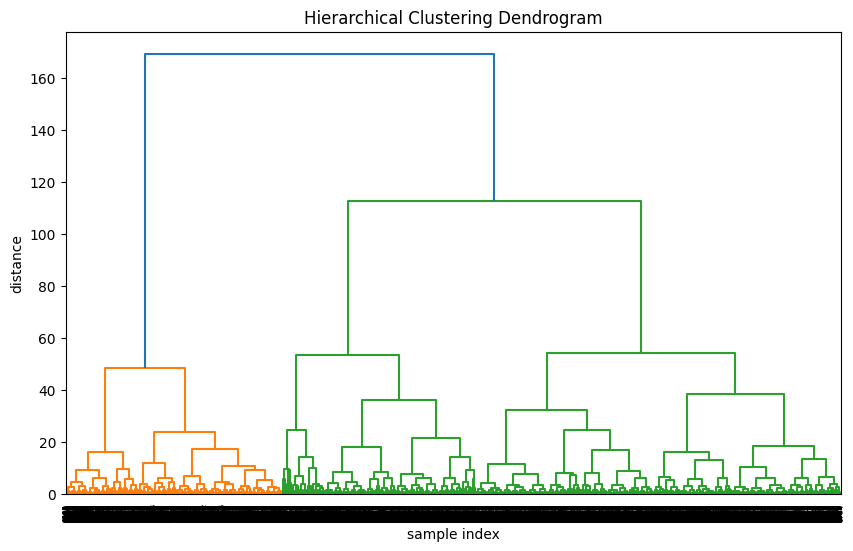

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

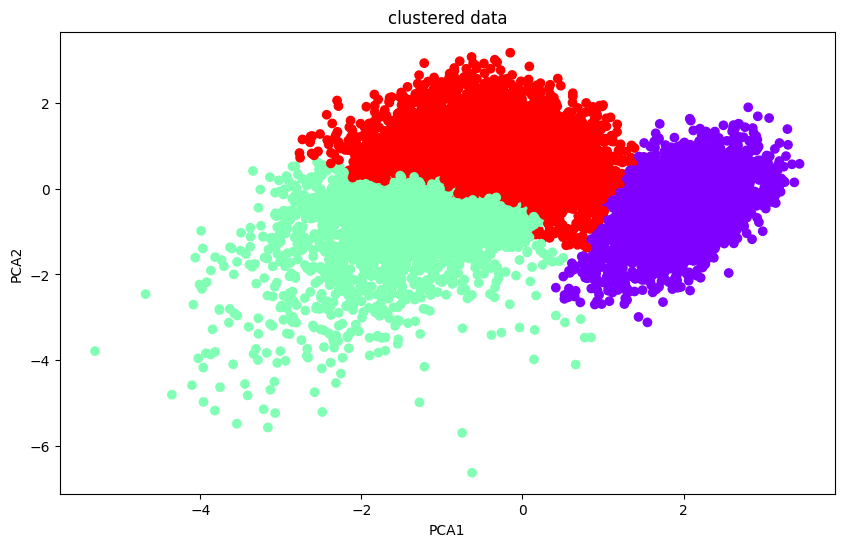

In [ ]:
clusters = fcluster(Z,t=3,criterion='maxclust')
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters,cmap='rainbow')
plt.title('clustered data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()